In [1]:
import sklearn.neighbors as neighbors
import sklearn.model_selection
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.datasets import fetch_openml, make_regression #Pour ElasticNet
from sklearn.linear_model import SGDRegressor, SGDClassifier, Lasso, ElasticNet, Ridge
from sklearn.svm import SVR

In [2]:
train = pd.read_csv('D:/Documents/cours/INSA/5A/Projet_Intégrateur/data/519dataframe.csv')
test = pd.read_csv('D:/Documents/cours/INSA/5A/Projet_Intégrateur/data/519dataframe.csv')
#print(train)
# idstation | annee | num_semaine | jour_semaine | heure | nb_arrives | nb_departs | entier_weather

In [3]:
X = [] # Contient tous les vecteurs [annee,semaine,jour,heure,weather]
Y = [] # Contient toutes les affluences (representees par un entier, somme des departs et arrivees)
with open('D:/Documents/cours/INSA/5A/Projet_Intégrateur/data/519dataframe.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader,None)
    for line in reader: 
        temp=[]
        a=line[0].replace("[","").replace("]","").replace(".0","").split(",")
        for elem in a:
            temp.append(int(elem))
        X.append(temp)
        Y.append(int(line[1]))

In [4]:
print(str(len(X))) # On verifie que X et Y font bien la meme longueur (=nbr lignes du csv)
print(str(len(Y)))
print(X[3])        # On verifie que X et Y ont bien la forme que l'on veut (X vecteur et Y entier)
print(Y[3])

38640
38640
[2013, 21, 6, 3, 1]
0


In [5]:
trainsize=0.7
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, train_size=trainsize)

In [6]:
print(str(len(X_train)))   # On verifie que xtrain et ytrain ont le meme nombre d'elements
print(str(len(Y_train)))
print(str(len(X_test)))    # On verifie que xtest et ytest ont le meme nombre d'elements
print(str(len(Y_test)))

27048
27048
11592
11592


# LINEAR

In [7]:
clf_linear=SVR(kernel='linear')
clf_linear.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
int(clf_linear.predict([[2016, 21, 6, 2, 1]]))

5

In [9]:
y_pred=clf_linear.predict(X_test)

In [10]:
# On peut faire une prediction ponctuelle et la comparer avec le resultat reel du dataset
print(X_test[0])  # Premier element de test
print(Y_test[0])  # Valeur du y associe (qu'on espere retrouver avec notre modele)
print(str(int(clf_linear.predict([X_test[0]])))) # valeur trouvee par le modele

[2014, 29, 3, 10, 1]
37
9


In [11]:
# On peut predire sur toutes les valeurs de test d'un coup et calculer le score du modele :
# Cela revient a faire la cellule d'avant mais sur l'ensemble des listes xtest et ytest
print(clf_linear.score(X_test, Y_test))

-0.05431763681072965


In [12]:
# "score" n'est pas forcément la meilleure façon d'evaluer notre modele, on peut aussi en prendre d'autres:
# voir https://scikit-learn.org/stable/modules/model_evaluation.html
# par exemple r2 score :
y_pred=[] # liste des valeurs predites par le modele
for elem in X_test:
    y_pred.append(clf_linear.predict([elem]))
print(r2_score(Y_test,y_pred))

-0.05431763681072965


# RBF

In [7]:
clf_rbf1=SVR(kernel='rbf')
clf_rbf1.fit(X_train,Y_train)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
int(clf_rbf1.predict([[2016, 21, 6, 2, 1]]))

1

In [9]:
y_pred=clf_rbf1.predict(X_test)

In [10]:
# On peut faire une prediction ponctuelle et la comparer avec le resultat reel du dataset
print(X_test[0])  # Premier element de test
print(Y_test[0])  # Valeur du y associe (qu'on espere retrouver avec notre modele)
print(str(int(clf_rbf1.predict([X_test[0]])))) # valeur trouvee par le modele

[2014, 26, 0, 1, 1]
0
2


In [11]:
# On peut predire sur toutes les valeurs de test d'un coup et calculer le score du modele :
# Cela revient a faire la cellule d'avant mais sur l'ensemble des listes xtest et ytest
print(clf_rbf1.score(X_test, Y_test))

0.35918804598911336


In [12]:
# "score" n'est pas forcément la meilleure façon d'evaluer notre modele, on peut aussi en prendre d'autres:
# voir https://scikit-learn.org/stable/modules/model_evaluation.html
# par exemple r2 score :
y_pred=[] # liste des valeurs predites par le modele
for elem in X_test:
    y_pred.append(clf_rbf1.predict([elem]))
print(r2_score(Y_test,y_pred))

0.35918804598911336


In [ ]:
#OK pour RBF mais pas pour LINEAR

# RBF avec gamma='auto'

In [13]:
clf_rbf2=SVR(kernel='rbf', gamma='auto')
clf_rbf2.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
int(clf_rbf2.predict([[2016, 21, 6, 2, 1]]))

1

In [15]:
y_pred=clf_rbf2.predict(X_test)

In [16]:
# On peut faire une prediction ponctuelle et la comparer avec le resultat reel du dataset
print(X_test[0])  # Premier element de test
print(Y_test[0])  # Valeur du y associe (qu'on espere retrouver avec notre modele)
print(str(int(clf_rbf2.predict([X_test[0]])))) # valeur trouvee par le modele

[2014, 26, 0, 1, 1]
0
2


In [17]:
# On peut predire sur toutes les valeurs de test d'un coup et calculer le score du modele :
# Cela revient a faire la cellule d'avant mais sur l'ensemble des listes xtest et ytest
print(clf_rbf2.score(X_test, Y_test))

0.35918804598911336


In [18]:
# "score" n'est pas forcément la meilleure façon d'evaluer notre modele, on peut aussi en prendre d'autres:
# voir https://scikit-learn.org/stable/modules/model_evaluation.html
# par exemple r2 score :
y_pred=[] # liste des valeurs predites par le modele
for elem in X_test:
    y_pred.append(clf_rbf2.predict([elem]))
print(r2_score(Y_test,y_pred))

0.35918804598911336


In [ ]:
#Conclusion :
    

# RBF avec modification des paramètres

In [30]:
clf_rbf3=SVR(kernel='rbf', C=1.5, epsilon=0.4)
clf_rbf3.fit(X_train,Y_train)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.4,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
int(clf_rbf3.predict([[2016, 21, 6, 2, 1]]))

1

In [8]:
y_pred=clf_rbf3.predict(X_test)

In [33]:
# On peut faire une prediction ponctuelle et la comparer avec le resultat reel du dataset
print(X_test[0])  # Premier element de test
print(Y_test[0])  # Valeur du y associe (qu'on espere retrouver avec notre modele)
print(str(int(clf_rbf3.predict([X_test[0]])))) # valeur trouvee par le modele

[2014, 26, 0, 1, 1]
0
2


In [34]:
# On peut predire sur toutes les valeurs de test d'un coup et calculer le score du modele :
# Cela revient a faire la cellule d'avant mais sur l'ensemble des listes xtest et ytest

#Bon score avec C={1.5; 2; 10}
print(clf_rbf3.score(X_test, Y_test))

0.44644003670656435


In [35]:
# "score" n'est pas forcément la meilleure façon d'evaluer notre modele, on peut aussi en prendre d'autres:
# voir https://scikit-learn.org/stable/modules/model_evaluation.html
# par exemple r2 score :
y_pred=[] # liste des valeurs predites par le modele
for elem in X_test:
    y_pred.append(clf_rbf3.predict([elem]))
print(r2_score(Y_test,y_pred))

0.4464400367065644


# PLOT

In [5]:
trainsize=0.7
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, train_size=trainsize)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

Text(0.5, 1.0, 'SVR - Tirage 1')

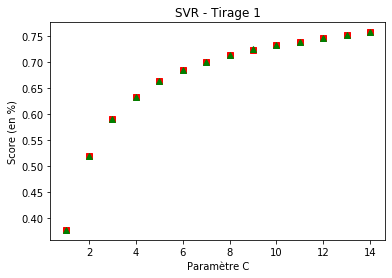

In [7]:
fig, ax = plt.subplots()
#ax.scatter(range(0,20), range(0,1))
for i in range(1, 15) :
    clf_rbf1=SVR(kernel='rbf', C=i)
    clf_rbf1.fit(X_train,Y_train)
    ax.plot(i,clf_rbf1.score(X_test, Y_test), "bo")
    clf_rbf2=SVR(kernel='rbf', gamma='auto', C=i)
    clf_rbf2.fit(X_train,Y_train)
    ax.plot(i, clf_rbf2.score(X_test, Y_test), "rs")
    clf_rbf3=SVR(kernel='rbf', C=i, epsilon=0.4)
    clf_rbf3.fit(X_train,Y_train)
    ax.plot(i, clf_rbf3.score(X_test, Y_test), "g^")
plt.xlabel("Paramètre C")
plt.ylabel("Score (en %)")
plt.title("SVR - Tirage 1")

# PRECOMPUTE

In [ ]:
clf=SVR(kernel='poly')
clf.fit(X_train,Y_train)

In [ ]:
int(clf.predict([[2016, 21, 6, 2, 1]]))

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
# On peut faire une prediction ponctuelle et la comparer avec le resultat reel du dataset
print(X_test[0])  # Premier element de test
print(Y_test[0])  # Valeur du y associe (qu'on espere retrouver avec notre modele)
print(str(int(clf.predict([X_test[0]])))) # valeur trouvee par le modele

In [ ]:
# On peut predire sur toutes les valeurs de test d'un coup et calculer le score du modele :
# Cela revient a faire la cellule d'avant mais sur l'ensemble des listes xtest et ytest
print(clf.score(X_test, Y_test))

In [ ]:
# "score" n'est pas forcément la meilleure façon d'evaluer notre modele, on peut aussi en prendre d'autres:
# voir https://scikit-learn.org/stable/modules/model_evaluation.html
# par exemple r2 score :
y_pred=[] # liste des valeurs predites par le modele
for elem in X_test:
    y_pred.append(clf.predict([elem]))
print(r2_score(Y_test,y_pred))